When Hollywood releases new movies, [Metacritic](https://www.metacritic.com/), [Fandango](https://www.fandango.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), and [IMDB](https://www.imdb.com/) use different systems to calculate ratings based on the reviews by movie critics and consumers.

Fandango has been suspected of releasing inflated ratings to increase ticket sales. After they found that some films that garnered poor ratings elsewhere were rated highly on Fandango, analysts from [FiveThirtyEight](https://app.dataquest.io/m/275/bar-charts%2C-histograms%2C-and-box-plots/1/www.fivethirtyeight.com) investigated and published [an article about bias in movie ratings](https://fivethirtyeight.com/features/fandango-movies-ratings/).

To conduct the investigation, the team compiled [data](https://github.com/fivethirtyeight/data/tree/master/fandango) for 147 films from 2015 with reviews from movie critics and consumers.

In this file, we'll use `ggplot2` to visualize reviews from Metacritic, Fandango, Rotten Tomatoes, and IMDB to get a sense for differences in the way the four sites compute movie ratings.

`reviews <- read_csv("movie_reviews.csv")`

The `reviews` data frame contains four ratings, one from each movie rating site, for each film:

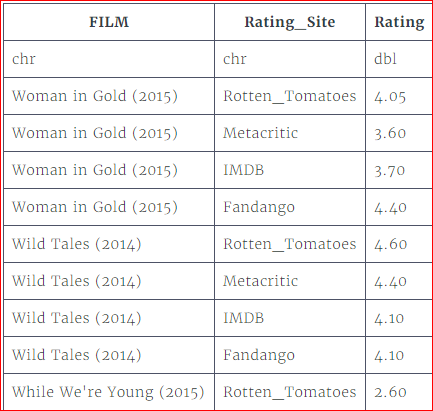

Let's start by getting a sense for how reviews reported by the four sites compare.

We can approach this problem by calculating the average ratings for each rating site. To do this, we could group the `reviews` data frame into one group for each value of `Rating_Site` and calculate the average of `Rating` for each group.

We will perform summary calculations on grouped data, are known as `"split-apply-combine"` problems.

Once we've calculated average ratings for each site, we'll introduce to a new type of graph for visualizing comparisons among groups, or categories, of data.

`review_avgs <- reviews %>% group_by(Rating_Site) %>% summarize(mean(Rating))`

We've now created a new summary data frame, `review_avgs`, with an average rating for each movie rating site:

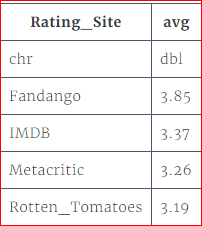


In the last two files, when we were interested in understanding how life expectancy changed over time, we learned to create line graphs. Line graphs are useful for depicting changes in a dependent variable (life expectancy) over time (the independent variable).

In this file, instead of changes over time, we are interested in the differences between four groups: The movie review sites. We'll learn to use different types of visualizations to understand the facets of the data we're interested in.

The first type of data visualization we'll learn about in this file is a [bar chart](https://en.wikipedia.org/wiki/Bar_chart). Bar charts represent grouped data summeries using bars with heights proportional to values of a summary variable such as the average:

Like line graphs, bar charts depict the relationship between two variables. In bar chart, groups are indicated on the x-axis since they are the independent variable. The average for each group, the dependent variable, is on the y-axis.

To create a bar chart to visualize the average ratings for each movie rating site, we would use the `review_avgs` data frame we created when we grouped and summarized the reviews data frame.

The syntax for the data and aesthetics layers we'll specify when creating a bar chart with `ggplot2` is the same as the syntax we learned when creating line graphs. We'll specify the `review_avgs` data frame as the data layer, and the `rating_site` and `avg` variables as `x` and `y`, respectively.

`ggplot(data = review_avgs, aes(x = rating_site, y = avg))`

The layer that distinguishes a bar chart from a line graph is the layer in which we'll specify the geometric shape used to display the data. While before we used `geom_line()`, now we'll use `geom_bar()`:

`geom_bar(stat = "identity")`

In the code above, we specify `stat = "identity"` within the `geom_bar()` layer. This is because, by default, using `geom_bar()` creates a bar graph where the height of the bars corresponds to the number of values in the specified y-variable. Using `stat = "identity"` overrides the default behavior and creates bars equal to the value of the y-variable, the average.

**Task**

* Let's practice creating a bar chart to display the differences in average movie ratings among review sites.

**Answer**

`review_avgs <- reviews %>%
  group_by(Rating_Site) %>%
  summarize(avg = mean(Rating))
ggplot(data = review_avgs,
  aes(x = Rating_Site, y = avg)) +
  geom_bar(stat = "identity")`

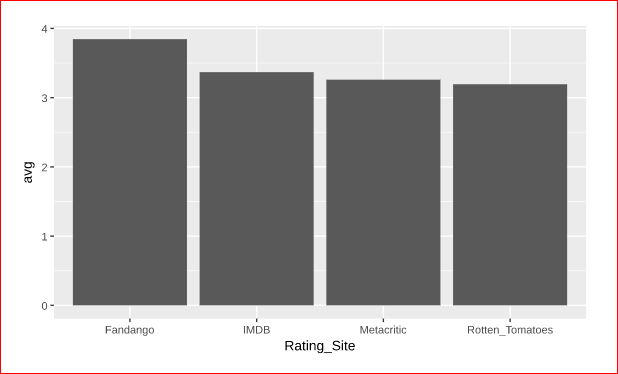

As we look at the chart, we can clearly see that Fandango has a higher average movie rating than the other three sites. Does this mean Fandango tends to give higher ratings?

Let's think about what the bar chart does not show us. It makes sense to wonder if Fandango's average movie rating is higher than those of the other sites because it tends to give all movies good ratings, or because it gave some movies average ratings and a small number of movies excellent ratings.

However, the bar graph does not provide this information.

The average of a set of numbers does not tell us anyting about the spread of the numbers that were used to calculate the average. For example, the values of these two variables both have an average of 5:

* `Variable 1`: 5 5 5 5 5 4 5 5 6 5
* `Variable 2`: 20 9 1 2 8 4 9 5 7

However, while values of Variable 1 are distributed between 4 and 6, values of Variable 2 are distributed between 1 and 20. The values of Variable 2 are much more spread out than those of Variable 1.

One such type of visual is a [histogram](https://en.wikipedia.org/wiki/Histogram). Unlike bar charts and line graphs, histograms are used to understand characteristics of one variable rather than the relationship between two variables.

Histograms depict the frequency with which values of a variable occur, otherwise known as the [distribution](https://en.wikipedia.org/wiki/Sampling_distribution) of the variable. For example, here is a histogram showing the distribution of all values of the Rating variable of the reviews data frame:

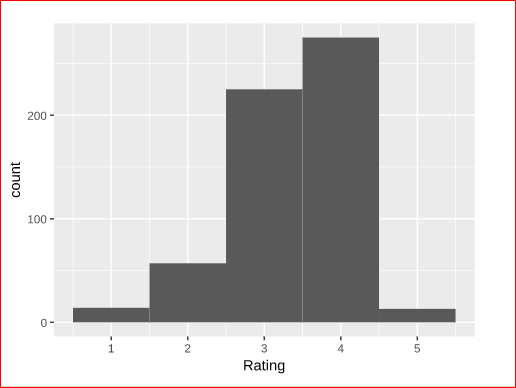

On the x-axis is the `Rating` variable. This histogram has aggregated, or "binned", values of the `Rating` variable into five categories:

* 0.5-1.5
* 1.5-2.5
* 2.5-3.5
* 3.5-4.5
* 4.5-5.5

On the y-axis is a variable that is calculated automatically when we create the histogram: `count`. The `count` variable represents the number of values of the `Rating` variable that fall into each of the five categories on the x-axis.

This histogram tells us that many values of the `Rating` variable fall into the 2.5-3.5 and 3.5-4.5 categories. Very few fall into the 0.5-1.5 and 4.5-5.5 categories.

To visualize data using a histogram, the syntax for the data and aesthetics layers are similar to what we have used to generate line graphs and bar charts:

`ggplot(data = reviews, 
  aes(x = Rating)) +
  geom_histogram(binwidth = 1)`

Within the `aes()` layer, we only need to specify the independent variable. Remember when we create a histogram, the dependent variable `count` is calculated for us.

The `geom_histogram()` layer specifies creation of a histogram to represent the independent variable. The argument `binwidth = 1` specifies the size of the categories used to bin the values of the independent variable.

Within the `geom_histogram()` layer, we can use two different arguments to specify the number of categories for binning the independent variable.

* `binwidth =` allows us to specify the size of the bins, and is useful for instances, such as this example, where we want categories to span specific intervals.
* `bins =` allows us to specify the number of bins, which can be useful to experiment with when deciding how much detail you want to use to display our data.

If we don't use any arguments within the `geom_histogram()` layer, `ggplot2` will use a default number of bins.

**Task**

* Create a histogram to show the distribution of all values of the Rating variable in the reviews data frame.
* Specify 30 bins to categorize values of the independent variable.

**Answer**

`ggplot(data = reviews, 
  aes(x = Rating)) +
  geom_histogram(bins = 30)`

From the histogram we created, we can see that increasing the number of bins produces a visualization of the data with greater detail:

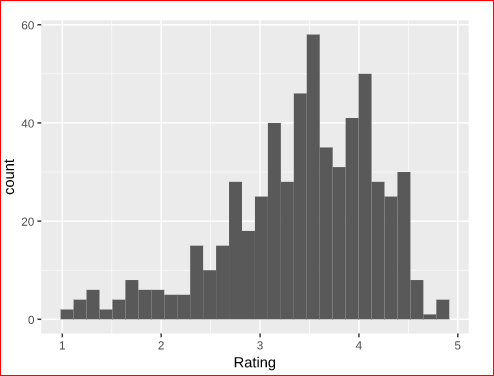

Histograms allow us to visualize the shape of a distribution — where values of the data are clustered. Most values of `Rating` are clustered between 3.5 and 4.5.

This histogram tells us about the distribution of all values of the Rating variable, but what we really want to investigate is how ratings for different rating sites differ.

One way to compare Rating distributions for the four sites is to create a faceted plot, as we learned to do for line graphs.

Recall that to create a faceted plot for categories of a variable, we can add a layer to our graph using `facet_wrap()`:

`facet_wrap(~Rating_Site)`

**Task**

* Let's visualize differences in the distributions of ratings for each movie rating site.

**Answer**

`ggplot(data = reviews, 
  aes(x = Rating)) +
  geom_histogram(bins = 30) +
  facet_wrap(~Rating_Site, nrow= 2)`

The four histograms in our faceted plot show differences in the distributions for each rating site:

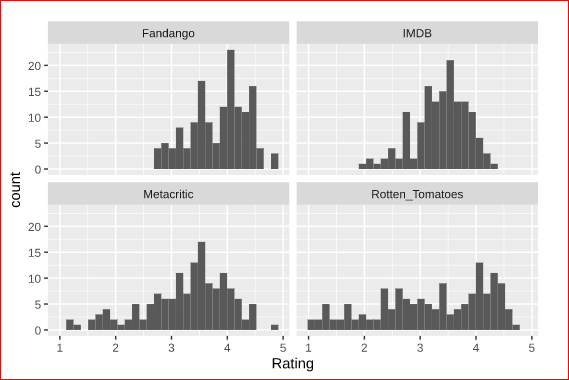

The distributions of `Rating` for Rotten Tomatoes and Metacritic indicate that those two sites are more likely to give movies poor ratings than `Fandango` or `IMDB`, which have most values of `Rating` clustered over 3.

Comparing these distributions suggests some sites give poor ratings more often than others. For example, the difference between the distributions of `Ratings` for Fandango and Rotten Tomatoes is very clear. However, Fandango and IMDB have distributions that look similar. Is there a better way to visualize differences between them?

Remember that when we created line charts, plotting multiple variables on the same set of axes was useful for creating a more nuanced comparison. Similarly, we can plot histograms for the four rating sites on the same set of axes.

As we did for line graphs, we can distinguish values associated with different variables by mapping them to different colors within the `aes()` layer:

`ggplot(data = reviews, 
  aes(x = Rating, color = Rating_Site)) +
  geom_histogram(bins = 30)`

When creating histograms (or bar charts), using the argument `color =` within `aes()` maps we specified variable to bar outlines of different colors:

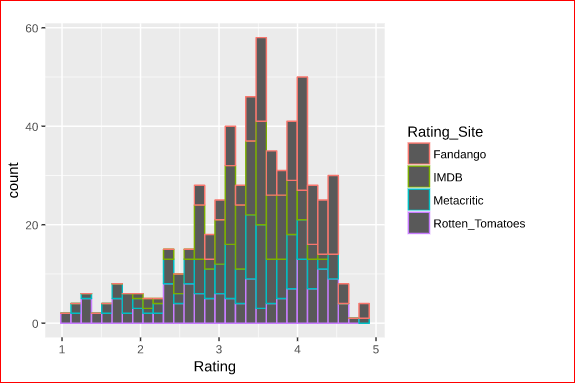

In the histogram above, the number of values of `Rating` for each value of `Rating_Site` are indicated by bars outlined by different colors.

Another option for using aesthetics to map values of `Rating` to different values of `Rating_Site` is to use the argument `fill =` instead of `color =`. Instead of outlines, `fill =` depicts bars filled in with different colors. Let's use this option to visualize differences in Rating distributions of the four sites.

`ggplot(data = reviews, 
  aes(x = Rating, fill= Rating_Site)) +
  geom_histogram(bins = 30)`
  
  
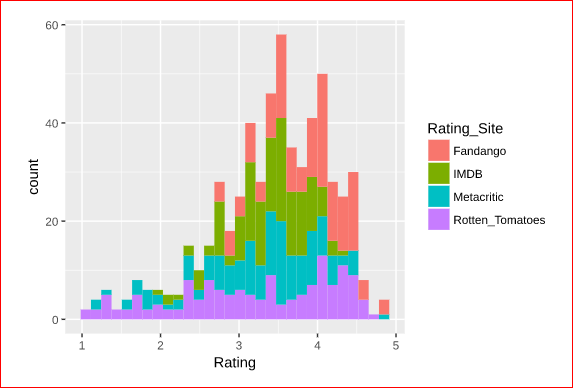

Visualizing the distributions of `Rankings` for each rating site makes it clear that Fandango is more likely to rate movies highly than the other sites are, which supports the argument that it is biased toward assigning higher ratings.

We'll often use histograms in our data science career for initial explorations of our data. Knowing how to visualize and interpret distributions will become increasingly important later on when we learn about statistics and modeling.

Now that we're able to make bar charts to visualize data summaries and histograms to visualize data distributions, we'll introduce to a type of plot for visualizing both the center of and the variation in our data.

Like bar graphs, [box plots](https://en.wikipedia.org/wiki/Box_plot) provide a summary of data by group. Like histograms, they provide information about how data are spread.

To create a box plot using `ggplot2`, the syntax for creating the data layer and mapping data to x and y variables is familiar. We'll add a `geom_boxplot()` layer to specify creation of a box plot.

**Task**

* Let's create a box plot of ratings for each site in the reviews data frame.

**Answer**

`ggplot(data = reviews,
  aes(x = Rating_Site, y = Rating)) +
  geom_boxplot()`

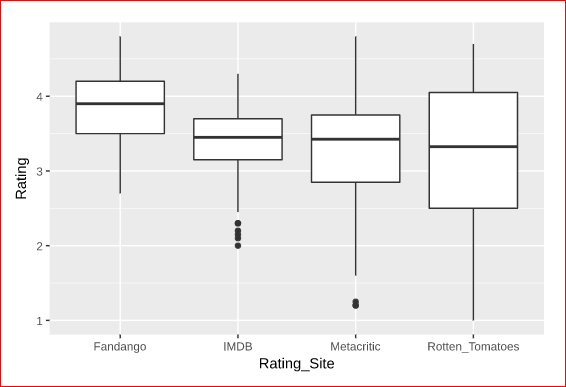

In general, we can see that the box representing Fandango ratings is higher up on the y-axis than those for the other sites. We can also see the Rotten Tomatoes ratings appear to be more spread out, which is consistent with what we saw when we plotted the data using histograms.

While we've been able to glean some information from this box plot, let's dig deeper into the individual components to fully understand all they can tell us about data.

Box plots present what is known to statisticians as a [five-number summary](https://en.wikipedia.org/wiki/Five-number_summary). The five numbers refer to percentiles of the data we're working with:

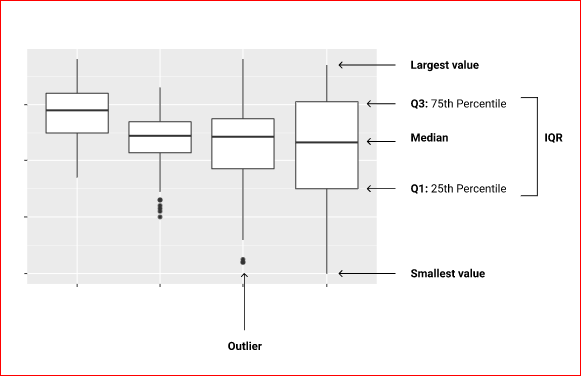

The five percentiles summarized by a box plot are:

* **The largest value**: Represented by the top of the black line extending from the top of the box. These lines are also known as "whiskers".
* **The third quartile (Q3)**: Represented by the top of the box. Seventy-five percent of the values are smaller than the third quartile.
* **The median**: Represented by the thick black line. The median is the value that falls in the middle of the data.
* **The first quartile (Q1)**: Represented by the bottom of the box. Twenty-five percent of the values are smaller than the first quartile.
* **The smallest value**: Represented by the bottom of the black line extending from the bottom of the box.

The white box, bounded by Q3 and Q1, is referred to as the [Interquartile Range](https://en.wikipedia.org/wiki/Interquartile_range) or IQR. The IQR encompasses 50 percent of the data, and is calculated by subtracting Q1 from Q3.

In the box plot we created, notice there are some points that fall below the bottom of the black lines that represent the smallest values. These points are referred to as [outliers](https://en.wikipedia.org/wiki/Interquartile_range#Outliers) because they are outside the range of what would be expected based on the rest of the data.

When we make a box plot using `ggplot2`, data points that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR are defined as outliers. This definition is based on the work of statisticians.

Now that we've delved into the meaning of the components of a box plot, what can we learn about the movie rating data? Here are some observations:

* Values of `Rating` for Rotten Tomatoes are spread out, indicating they regularly give movies ratings that range from poor to excellent.

* The range of values of `Rating` for Fandango and IMDB are both quite narrow. Fandango's lowest reviews are around 2.5, whle outliers indicate that IMDB has some reviews that are between 2 and 2.4.

* Fandango's median for values of `Rating` is higher than the median of the other sites, indicating Fandango tends to give higher ratings.

**Task**
* Add following layers to the plot in creating box plot
    * White panel background
    * The plot title: "Comparison of Movie Ratings"
    
**Answer**

`ggplot(data = reviews,
  aes(x = Rating_Site, y = Rating)) +
  geom_boxplot() +
  labs(title = "Comparison of Movie Ratings") +
  theme(panel.background = element_rect(fill = "white"))`

When should we use the three types of plots we learned about in this file? However, here are some general guidelines:

* Bar charts may be used for showing a quick summary of our data, such as averages or counts of the number of instances of a value that occur for a given variable.

* Histograms are useful for visualizing distributions of data when we want to know the shape of a distribution (in other words, where most values are clustered).

* Box plots provide an informative summary of the shape, spread, and center of our data.